In [ ]:
# # For cloud-vm Jupyter lab where I dont have easy control over width yet
# # jupyter full-width cells https://github.com/jupyter/notebook/issues/1909#issuecomment-266116532
# from IPython.core.display import display, HTML
# display(HTML("<style>.container { width:100% !important; }</style>"))

# Download and clean data for the fighterjet dataset.

---

2018-12-12

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
from fastai import *
from fastai.vision import *
from fastai.widgets import *; __version__

'1.0.32'

In [12]:
!ls fighterjet

fighter-jets-classes-to-dl.md  fighterjet-urls	removal_urls.pkl


In [13]:
path = Config.data_path()/'aircraft'; path.mkdir(parents=True, exist_ok=True) # set & create data directory
! cp -r fighterjet/fighterjet-urls {path}/ # copy urls to data directory

In [14]:
urls = path/'fighterjet-urls'

In [15]:
urls.ls()

[PosixPath('/home/jupyter/.fastai/data/aircraft/fighterjet-urls/f18c.txt'),
 PosixPath('/home/jupyter/.fastai/data/aircraft/fighterjet-urls/su25.txt'),
 PosixPath('/home/jupyter/.fastai/data/aircraft/fighterjet-urls/f14.txt'),
 PosixPath('/home/jupyter/.fastai/data/aircraft/fighterjet-urls/f16.txt'),
 PosixPath('/home/jupyter/.fastai/data/aircraft/fighterjet-urls/mig29.txt'),
 PosixPath('/home/jupyter/.fastai/data/aircraft/fighterjet-urls/f15e.txt'),
 PosixPath('/home/jupyter/.fastai/data/aircraft/fighterjet-urls/su27.txt'),
 PosixPath('/home/jupyter/.fastai/data/aircraft/fighterjet-urls/f18e.txt'),
 PosixPath('/home/jupyter/.fastai/data/aircraft/fighterjet-urls/su17.txt'),
 PosixPath('/home/jupyter/.fastai/data/aircraft/fighterjet-urls/rafale.txt'),
 PosixPath('/home/jupyter/.fastai/data/aircraft/fighterjet-urls/j20.txt'),
 PosixPath('/home/jupyter/.fastai/data/aircraft/fighterjet-urls/su34.txt'),
 PosixPath('/home/jupyter/.fastai/data/aircraft/fighterjet-urls/typhoon.txt'),
 PosixPat

## 1. download dataset

In [16]:
# download dataset
for url_path in urls.ls():
    aircraft_type = url_path.name.split('.')[0] # get class name
    print(f'downloading: {aircraft_type}')
    dest = path/aircraft_type; dest.mkdir(parents=True, exist_ok=True) # set & create class folder
    download_images(url_path, dest)

downloading: f18c


downloading: su25


Error https://politikus.ru/uploads/posts/2018-02/1517681259_9.jpg HTTPSConnectionPool(host='politikus.ru', port=443): Max retries exceeded with url: /uploads/posts/2018-02/1517681259_9.jpg (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x7f770dcdbac8>: Failed to establish a new connection: [Errno -3] Temporary failure in name resolution',))
downloading: f14


downloading: f16


Error https://fas.org/man/dod-101/sys/ac/f-16-98904f16lgb.jpg HTTPSConnectionPool(host='fas.org', port=443): Read timed out. (read timeout=4)
Error http://images.china.cn/attachement/jpg/site1007/20120723/000cf1bdd03f1176f3bf05.JPG HTTPConnectionPool(host='images.china.cn', port=80): Read timed out. (read timeout=4)
downloading: mig29


Error https://cdn.aiidatapro.net/media/67/8e/af/t780x490/678eafb040f8daf60b3f333398545e5b.jpg HTTPSConnectionPool(host='cdn.aiidatapro.net', port=443): Read timed out.
downloading: f15e


downloading: su27


Error https://wallpapersite.com/images/wallpapers/sukhoi-su-27-2560x1600-russian-air-force-flight-5160.jpg HTTPSConnectionPool(host='wallpapersite.com', port=443): Read timed out.
Error https://www.stripes.com/polopoly_fs/1.552126.1539715152!/image/image.jpg_gen/derivatives/landscape_900/image.jpg HTTPSConnectionPool(host='www.stripes.com', port=443): Read timed out. (read timeout=4)
downloading: f18e


downloading: su17


Error http://www.aeroresource.co.uk/kecskemet-airshow-poland-su-22-fitter_2/ HTTPConnectionPool(host='www.aeroresource.co.uk', port=80): Read timed out. (read timeout=4)
downloading: rafale


downloading: j20


Error http://www.sinaimg.cn/dy/slidenews/8_img/2016_46/193_219111_893468.jpg HTTPConnectionPool(host='www.sinaimg.cn', port=80): Read timed out. (read timeout=4)
Error http://img6.cache.netease.com/photo/0001/2015-12-15/BASA6TML00AN0001.jpg HTTPConnectionPool(host='img6.cache.netease.com', port=80): Read timed out. (read timeout=4)
Error https://static.technode.com/wp-content/blogs.dir/18/files/2018/03/meilan_e3_2.jpg HTTPSConnectionPool(host='static.technode.com', port=443): Read timed out. (read timeout=4)
downloading: su34


Error https://politikus.ru/uploads/posts/2018-06/1529864441_shutterstock_514425547.jpg HTTPSConnectionPool(host='politikus.ru', port=443): Max retries exceeded with url: /uploads/posts/2018-06/1529864441_shutterstock_514425547.jpg (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x7f770ed7aac8>: Failed to establish a new connection: [Errno -3] Temporary failure in name resolution',))
downloading: typhoon


Error http://brahmand.com/newsimages/72646963959534fa1d7d92.jpg HTTPConnectionPool(host='brahmand.com', port=80): Read timed out. (read timeout=4)
downloading: mig27


Error http://brahmand.com/newsimages/17575530515a49d382c855b.jpg HTTPConnectionPool(host='brahmand.com', port=80): Read timed out. (read timeout=4)
downloading: f22


downloading: mig21


downloading: su57


Error https://politikus.ru/uploads/posts/2018-01/1516820520_snimok.jpg HTTPSConnectionPool(host='politikus.ru', port=443): Max retries exceeded with url: /uploads/posts/2018-01/1516820520_snimok.jpg (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x7f770f5fdf98>: Failed to establish a new connection: [Errno -3] Temporary failure in name resolution',))
downloading: su24


Error https://belprauda.org/wp-content/uploads/2017/10/KMO_153379_00038_1_t218_111324.jpg HTTPSConnectionPool(host='belprauda.org', port=443): Max retries exceeded with url: /wp-content/uploads/2017/10/KMO_153379_00038_1_t218_111324.jpg (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x7f770f5ffbe0>: Failed to establish a new connection: [Errno 113] No route to host',))
Error https://politikus.ru/uploads/posts/2017-10/1507625084_shutterstock_463033183.jpg HTTPSConnectionPool(host='politikus.ru', port=443): Max retries exceeded with url: /uploads/posts/2017-10/1507625084_shutterstock_463033183.jpg (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x7f770dcdbef0>: Failed to establish a new connection: [Errno -3] Temporary failure in name resolution',))
downloading: tornado


downloading: su30


Error http://www.xairforces.net/images/news/large_news/Uganda-Peoples-Defence-Force-Air-Wing_Sukhoi_Su-30MK2_Flanker-C_060513.jpg HTTPConnectionPool(host='www.xairforces.net', port=80): Read timed out. (read timeout=4)
downloading: jas39


Error https://www.atynews.com/wp-content/uploads/2018/05/Saab-JAS-39-Gripen.jpg HTTPSConnectionPool(host='www.atynews.com', port=443): Max retries exceeded with url: /wp-content/uploads/2018/05/Saab-JAS-39-Gripen.jpg (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x7f770f5ffe48>: Failed to establish a new connection: [Errno -3] Temporary failure in name resolution',))
Error http://xairforces.net/images/news/large_news/Swiss_JAS-39-Gripens_050612.jpg HTTPConnectionPool(host='xairforces.net', port=80): Read timed out. (read timeout=4)
downloading: f15c


downloading: mig31


downloading: f35


downloading: f4


downloading: mig23


Error https://libertycity.ru/uploads/download/gtasa_air/fulls/1302524035_mig23.jpg HTTPSConnectionPool(host='libertycity.ru', port=443): Max retries exceeded with url: /uploads/download/gtasa_air/fulls/1302524035_mig23.jpg (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x7f770dcdb240>: Failed to establish a new connection: [Errno -2] Name or service not known',))
downloading: mig25


## 3. Verify downloads

Delete all corrupted downloads:

In [17]:
aircraft_types = [c.name.split('.')[0] for c in urls.ls()]

In [18]:
for c in aircraft_types:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

f18c


cannot identify image file <_io.BufferedReader name='/home/jupyter/.fastai/data/aircraft/f18c/00000252.jpg'>
cannot identify image file <_io.BufferedReader name='/home/jupyter/.fastai/data/aircraft/f18c/00000288.jpg'>
cannot identify image file <_io.BufferedReader name='/home/jupyter/.fastai/data/aircraft/f18c/00000174.jpg'>
cannot identify image file <_io.BufferedReader name='/home/jupyter/.fastai/data/aircraft/f18c/00000258.jpg'>
cannot identify image file <_io.BufferedReader name='/home/jupyter/.fastai/data/aircraft/f18c/00000141.jpg'>
su25


cannot identify image file <_io.BufferedReader name='/home/jupyter/.fastai/data/aircraft/su25/00000098.jpg'>
cannot identify image file <_io.BufferedReader name='/home/jupyter/.fastai/data/aircraft/su25/00000104.jpg'>
f14


cannot identify image file <_io.BufferedReader name='/home/jupyter/.fastai/data/aircraft/f14/00000181.jpg'>


/opt/anaconda3/lib/python3.6/site-packages/PIL/Image.py:953: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


f16


cannot identify image file <_io.BufferedReader name='/home/jupyter/.fastai/data/aircraft/f16/00000282.jpg'>
Image /home/jupyter/.fastai/data/aircraft/f16/00000070.jpg has 4 instead of 3
cannot identify image file <_io.BufferedReader name='/home/jupyter/.fastai/data/aircraft/f16/00000307.jpg'>
cannot identify image file <_io.BufferedReader name='/home/jupyter/.fastai/data/aircraft/f16/00000186.jpg'>
mig29


cannot identify image file <_io.BufferedReader name='/home/jupyter/.fastai/data/aircraft/mig29/00000243.jpg'>
cannot identify image file <_io.BufferedReader name='/home/jupyter/.fastai/data/aircraft/mig29/00000254.jpeg'>
Image /home/jupyter/.fastai/data/aircraft/mig29/00000294.png has 1 instead of 3
f15e


cannot identify image file <_io.BufferedReader name='/home/jupyter/.fastai/data/aircraft/f15e/00000154.png'>
Image /home/jupyter/.fastai/data/aircraft/f15e/00000160.png has 4 instead of 3
cannot identify image file <_io.BufferedReader name='/home/jupyter/.fastai/data/aircraft/f15e/00000091.jpg'>
cannot identify image file <_io.BufferedReader name='/home/jupyter/.fastai/data/aircraft/f15e/00000059.jpg'>
su27


cannot identify image file <_io.BufferedReader name='/home/jupyter/.fastai/data/aircraft/su27/00000067.jpg'>
Image /home/jupyter/.fastai/data/aircraft/su27/00000204.jpg has 1 instead of 3
cannot identify image file <_io.BufferedReader name='/home/jupyter/.fastai/data/aircraft/su27/00000245.jpg'>
Image /home/jupyter/.fastai/data/aircraft/su27/00000024.png has 4 instead of 3
cannot identify image file <_io.BufferedReader name='/home/jupyter/.fastai/data/aircraft/su27/00000123.jpg'>
cannot identify image file <_io.BufferedReader name='/home/jupyter/.fastai/data/aircraft/su27/00000230.jpg'>
cannot identify image file <_io.BufferedReader name='/home/jupyter/.fastai/data/aircraft/su27/00000100.jpg'>
f18e


cannot identify image file <_io.BufferedReader name='/home/jupyter/.fastai/data/aircraft/f18e/00000069.jpg'>
cannot identify image file <_io.BufferedReader name='/home/jupyter/.fastai/data/aircraft/f18e/00000259.jpg'>
cannot identify image file <_io.BufferedReader name='/home/jupyter/.fastai/data/aircraft/f18e/00000191.jpg'>
cannot identify image file <_io.BufferedReader name='/home/jupyter/.fastai/data/aircraft/f18e/00000171.jpg'>
Image /home/jupyter/.fastai/data/aircraft/f18e/00000277.gif has 1 instead of 3
cannot identify image file <_io.BufferedReader name='/home/jupyter/.fastai/data/aircraft/f18e/00000086.jpg'>
cannot identify image file <_io.BufferedReader name='/home/jupyter/.fastai/data/aircraft/f18e/00000164.jpg'>
cannot identify image file <_io.BufferedReader name='/home/jupyter/.fastai/data/aircraft/f18e/00000224.jpg'>
su17


cannot identify image file <_io.BufferedReader name='/home/jupyter/.fastai/data/aircraft/su17/00000060.jpg'>
cannot identify image file <_io.BufferedReader name='/home/jupyter/.fastai/data/aircraft/su17/00000037.jpg'>
cannot identify image file <_io.BufferedReader name='/home/jupyter/.fastai/data/aircraft/su17/00000103.jpg'>
cannot identify image file <_io.BufferedReader name='/home/jupyter/.fastai/data/aircraft/su17/00000012.jpg'>
cannot identify image file <_io.BufferedReader name='/home/jupyter/.fastai/data/aircraft/su17/00000092.jpg'>
Image /home/jupyter/.fastai/data/aircraft/su17/00000134.png has 4 instead of 3
Image /home/jupyter/.fastai/data/aircraft/su17/00000121.png has 4 instead of 3
cannot identify image file <_io.BufferedReader name='/home/jupyter/.fastai/data/aircraft/su17/00000184.jpg'>
cannot identify image file <_io.BufferedReader name='/home/jupyter/.fastai/data/aircraft/su17/00000153.jpg'>
cannot identify image file <_io.BufferedReader name='/home/jupyter/.fastai/data

cannot identify image file <_io.BufferedReader name='/home/jupyter/.fastai/data/aircraft/rafale/00000259.jpg'>
cannot identify image file <_io.BufferedReader name='/home/jupyter/.fastai/data/aircraft/rafale/00000282.jpg'>
cannot identify image file <_io.BufferedReader name='/home/jupyter/.fastai/data/aircraft/rafale/00000158.jpg'>
j20


Image /home/jupyter/.fastai/data/aircraft/j20/00000243.png has 4 instead of 3
image file could not be identified because WEBP support not installed


/opt/anaconda3/lib/python3.6/site-packages/PIL/Image.py:1006: UserWarning: Couldn't allocate palette entry for transparency
  "for transparency")


int() argument must be a string, a bytes-like object or a number, not 'tuple'
cannot identify image file <_io.BufferedReader name='/home/jupyter/.fastai/data/aircraft/j20/00000230.jpg'>


/opt/anaconda3/lib/python3.6/site-packages/PIL/Image.py:1006: UserWarning: Couldn't allocate palette entry for transparency
  "for transparency")


int() argument must be a string, a bytes-like object or a number, not 'tuple'
su34


typhoon


cannot identify image file <_io.BufferedReader name='/home/jupyter/.fastai/data/aircraft/typhoon/00000113.jpg'>
cannot identify image file <_io.BufferedReader name='/home/jupyter/.fastai/data/aircraft/typhoon/00000268.jpg'>
cannot identify image file <_io.BufferedReader name='/home/jupyter/.fastai/data/aircraft/typhoon/00000152.jpg'>
mig27


/opt/anaconda3/lib/python3.6/site-packages/PIL/Image.py:1006: UserWarning: Couldn't allocate palette entry for transparency
  "for transparency")


int() argument must be a string, a bytes-like object or a number, not 'tuple'
Image /home/jupyter/.fastai/data/aircraft/mig27/00000022.png has 4 instead of 3
cannot identify image file <_io.BufferedReader name='/home/jupyter/.fastai/data/aircraft/mig27/00000161.jpg'>
f22


cannot identify image file <_io.BufferedReader name='/home/jupyter/.fastai/data/aircraft/f22/00000241.jpg'>
cannot identify image file <_io.BufferedReader name='/home/jupyter/.fastai/data/aircraft/f22/00000284.jpg'>
cannot identify image file <_io.BufferedReader name='/home/jupyter/.fastai/data/aircraft/f22/00000184.jpg'>
cannot identify image file <_io.BufferedReader name='/home/jupyter/.fastai/data/aircraft/f22/00000168.jpg'>
Image /home/jupyter/.fastai/data/aircraft/f22/00000232.png has 4 instead of 3
Image /home/jupyter/.fastai/data/aircraft/f22/00000271.jpg has 4 instead of 3
mig21


Image /home/jupyter/.fastai/data/aircraft/mig21/00000210.jpg has 1 instead of 3
cannot identify image file <_io.BufferedReader name='/home/jupyter/.fastai/data/aircraft/mig21/00000276.jpg'>
cannot identify image file <_io.BufferedReader name='/home/jupyter/.fastai/data/aircraft/mig21/00000288.jpg'>
cannot identify image file <_io.BufferedReader name='/home/jupyter/.fastai/data/aircraft/mig21/00000174.jpg'>
cannot identify image file <_io.BufferedReader name='/home/jupyter/.fastai/data/aircraft/mig21/00000086.jpg'>
cannot identify image file <_io.BufferedReader name='/home/jupyter/.fastai/data/aircraft/mig21/00000199.jpg'>
su57


su24


Image /home/jupyter/.fastai/data/aircraft/su24/00000243.png has 4 instead of 3
tornado


cannot identify image file <_io.BufferedReader name='/home/jupyter/.fastai/data/aircraft/tornado/00000137.jpg'>
cannot identify image file <_io.BufferedReader name='/home/jupyter/.fastai/data/aircraft/tornado/00000249.jpg'>
cannot identify image file <_io.BufferedReader name='/home/jupyter/.fastai/data/aircraft/tornado/00000144.png'>
cannot identify image file <_io.BufferedReader name='/home/jupyter/.fastai/data/aircraft/tornado/00000231.jpg'>
su30


cannot identify image file <_io.BufferedReader name='/home/jupyter/.fastai/data/aircraft/su30/00000122.jpg'>


/opt/anaconda3/lib/python3.6/site-packages/PIL/Image.py:1006: UserWarning: Couldn't allocate palette entry for transparency
  "for transparency")


int() argument must be a string, a bytes-like object or a number, not 'tuple'
cannot identify image file <_io.BufferedReader name='/home/jupyter/.fastai/data/aircraft/su30/00000116.jpg'>
Image /home/jupyter/.fastai/data/aircraft/su30/00000260.png has 4 instead of 3


/opt/anaconda3/lib/python3.6/site-packages/PIL/Image.py:1006: UserWarning: Couldn't allocate palette entry for transparency
  "for transparency")


int() argument must be a string, a bytes-like object or a number, not 'tuple'
cannot identify image file <_io.BufferedReader name='/home/jupyter/.fastai/data/aircraft/su30/00000093.jpg'>
cannot identify image file <_io.BufferedReader name='/home/jupyter/.fastai/data/aircraft/su30/00000076.jpg'>
cannot identify image file <_io.BufferedReader name='/home/jupyter/.fastai/data/aircraft/su30/00000257.jpg'>
jas39


cannot identify image file <_io.BufferedReader name='/home/jupyter/.fastai/data/aircraft/jas39/00000124.jpg'>
cannot identify image file <_io.BufferedReader name='/home/jupyter/.fastai/data/aircraft/jas39/00000265.jpg'>
cannot identify image file <_io.BufferedReader name='/home/jupyter/.fastai/data/aircraft/jas39/00000125.jpg'>
f15c


cannot identify image file <_io.BufferedReader name='/home/jupyter/.fastai/data/aircraft/f15c/00000237.jpg'>
cannot identify image file <_io.BufferedReader name='/home/jupyter/.fastai/data/aircraft/f15c/00000127.jpg'>
cannot identify image file <_io.BufferedReader name='/home/jupyter/.fastai/data/aircraft/f15c/00000181.jpg'>
Image /home/jupyter/.fastai/data/aircraft/f15c/00000086.png has 4 instead of 3
cannot identify image file <_io.BufferedReader name='/home/jupyter/.fastai/data/aircraft/f15c/00000176.jpg'>
cannot identify image file <_io.BufferedReader name='/home/jupyter/.fastai/data/aircraft/f15c/00000207.jpg'>
cannot identify image file <_io.BufferedReader name='/home/jupyter/.fastai/data/aircraft/f15c/00000199.jpg'>
cannot identify image file <_io.BufferedReader name='/home/jupyter/.fastai/data/aircraft/f15c/00000240.jpg'>
cannot identify image file <_io.BufferedReader name='/home/jupyter/.fastai/data/aircraft/f15c/00000250.jpg'>
mig31


Image /home/jupyter/.fastai/data/aircraft/mig31/00000177.gif has 1 instead of 3
cannot identify image file <_io.BufferedReader name='/home/jupyter/.fastai/data/aircraft/mig31/00000063.jpg'>
cannot identify image file <_io.BufferedReader name='/home/jupyter/.fastai/data/aircraft/mig31/00000225.jpg'>
cannot identify image file <_io.BufferedReader name='/home/jupyter/.fastai/data/aircraft/mig31/00000143.jpg'>
cannot identify image file <_io.BufferedReader name='/home/jupyter/.fastai/data/aircraft/mig31/00000240.jpg'>
cannot identify image file <_io.BufferedReader name='/home/jupyter/.fastai/data/aircraft/mig31/00000041.jpg'>
f35


/opt/anaconda3/lib/python3.6/site-packages/PIL/Image.py:1006: UserWarning: Couldn't allocate palette entry for transparency
  "for transparency")


int() argument must be a string, a bytes-like object or a number, not 'tuple'
f4


cannot identify image file <_io.BufferedReader name='/home/jupyter/.fastai/data/aircraft/f4/00000237.jpg'>
cannot identify image file <_io.BufferedReader name='/home/jupyter/.fastai/data/aircraft/f4/00000291.jpg'>
mig23


cannot identify image file <_io.BufferedReader name='/home/jupyter/.fastai/data/aircraft/mig23/00000165.jpg'>
Corrupt EXIF data.  Expecting to read 12 bytes but only got 10. 
Image /home/jupyter/.fastai/data/aircraft/mig23/00000191.png has 4 instead of 3
cannot identify image file <_io.BufferedReader name='/home/jupyter/.fastai/data/aircraft/mig23/00000167.jpg'>
cannot identify image file <_io.BufferedReader name='/home/jupyter/.fastai/data/aircraft/mig23/00000215.jpg'>
cannot identify image file <_io.BufferedReader name='/home/jupyter/.fastai/data/aircraft/mig23/00000104.jpg'>
cannot identify image file <_io.BufferedReader name='/home/jupyter/.fastai/data/aircraft/mig23/00000116.jpg'>
Image /home/jupyter/.fastai/data/aircraft/mig23/00000050.png has 1 instead of 3
cannot identify image file <_io.BufferedReader name='/home/jupyter/.fastai/data/aircraft/mig23/00000184.jpeg'>
cannot identify image file <_io.BufferedReader name='/home/jupyter/.fastai/data/aircraft/mig23/00000156.jpg'>
cann

cannot identify image file <_io.BufferedReader name='/home/jupyter/.fastai/data/aircraft/mig25/00000210.jpg'>
Image /home/jupyter/.fastai/data/aircraft/mig25/00000174.png has 4 instead of 3
Image /home/jupyter/.fastai/data/aircraft/mig25/00000034.png has 2 instead of 3
cannot identify image file <_io.BufferedReader name='/home/jupyter/.fastai/data/aircraft/mig25/00000145.jpg'>
cannot identify image file <_io.BufferedReader name='/home/jupyter/.fastai/data/aircraft/mig25/00000141.jpg'>
cannot identify image file <_io.BufferedReader name='/home/jupyter/.fastai/data/aircraft/mig25/00000140.jpg'>
cannot identify image file <_io.BufferedReader name='/home/jupyter/.fastai/data/aircraft/mig25/00000238.jpg'>
cannot identify image file <_io.BufferedReader name='/home/jupyter/.fastai/data/aircraft/mig25/00000047.jpg'>


## 3 image inspection

https://docs.fast.ai/data_block.html#Examples-of-use

In [26]:
src = (ImageItemList.from_folder(path)
      .random_split_by_pct(0.2)
      .label_from_folder())

data = (src.transform(get_transforms(), size=224)
           .databunch().normalize(imagenet_stats))

In [23]:
# factory method
# data = ImageDataBunch.from_folder(path, train="temp", valid_pct=0.2,
#                                   ds_tfms=get_transforms(), bs=64, size=224)

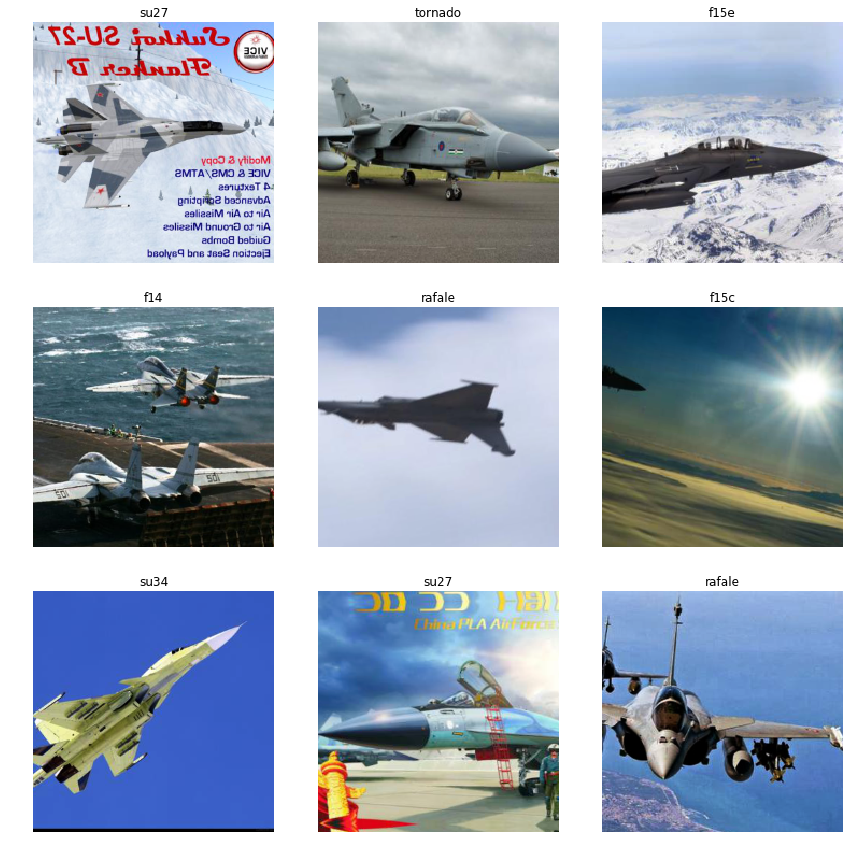

In [27]:
data.show_batch(rows=3)

Looks like it's ready for work.

## end